In [8]:
import sys 
import pandas as pd
import numpy as np

path = '../ml/'
sys.path.insert(0, path)
import ml_functions as ml

In [2]:
# Import data (Pandas DataFrame or Numpy array)
gama_path = '../../OBSERVATIONS/GAMA/GAMA_Galaxies/GAMA_sample.csv'
gama = pd.read_csv(gama_path)
gama

,CATAID,RA,DEC,Z,nQ,logmstar,dellogmstar,logage,dellogage,metal,delmetal,DistanceTo5nn,SurfaceDensity,SurfaceDensityErr
0,14505,211.88896,0.83437,0.10576,4,10.35820,0.108069,9.82304,0.193559,0.011483,0.008675,2.918,0.187,0.0129
1,14506,211.90117,0.72891,0.16509,4,10.68080,0.097580,9.83731,0.161593,0.012054,0.007652,1.736,0.561,0.0127
2,14517,211.88746,0.63093,0.11350,5,10.60020,0.109343,9.79827,0.202792,0.009935,0.007040,2.509,0.269,0.0061
3,14518,211.89292,0.68086,0.17236,4,9.68806,0.115392,9.47707,0.256020,0.011812,0.007421,2.113,0.379,0.0090
4,14519,211.89233,0.67899,0.17253,4,10.14390,0.109480,9.78456,0.198583,0.010978,0.007457,2.090,0.387,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20911,3157989,217.26279,2.85312,0.13856,4,9.27893,0.131946,9.57333,0.257999,0.010764,0.008359,0.881,2.052,0.1057
20912,3277603,213.49808,2.22350,0.16975,4,9.38690,0.155558,9.49979,0.295441,0.010669,0.009034,1.142,1.220,0.0936
20913,3279847,215.40962,2.16504,0.11119,4,9.70975,0.124740,9.80607,0.205594,0.011843,0.009228,3.182,0.157,0.0142
20914,3282877,218.18392,2.25756,0.11310,4,9.17488,0.137932,9.64837,0.258143,0.009871,0.008107,1.704,0.548,0.0442


#### AUTOENCODER 

- maybe add image of autoencoder diagram to better explain encoder, decoder and latent space? 

In [3]:
help(ml.autoencoder)

Help on function autoencoder in module ml_functions:

autoencoder(data, metrics=None, latent_dim=3, epochs=500)
    Perform autoencoder training on a dataset.
    
    Parameters:
    data (pandas.DataFrame or numpy.ndarray): Input data, either a pandas DataFrame or numpy array.
    metrics (list, optional): List of column names to be used if data is a DataFrame. Ignored if data is a numpy array.
    latent_dim (int, optional): Dimension of the latent space. Default is 3.
    epochs (int, optional): Number of epochs for training. Default is 500.
    
    Returns:
    model_history: History of model training.
    encoded_x_train: Encoded training data.



2024-08-06 07:26:35.383423: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


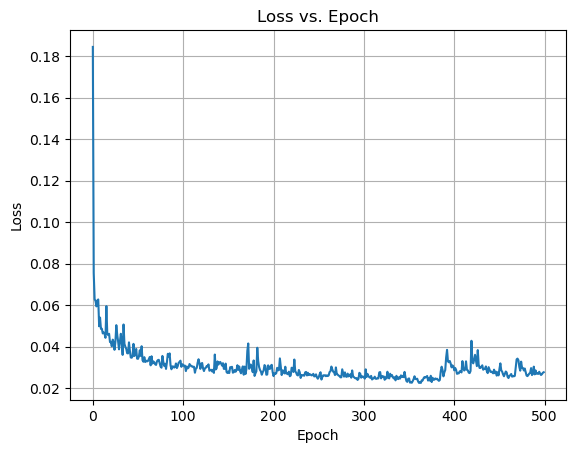

387/654 [================>.............] - ETA: 0s

/Users/Daniel/Documents/Research Projects/Gotham_Web/ML/Tutorials/../ml/ml_functions.py:164: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(metrics)


654/654 [==============================] - 0s 259us/step


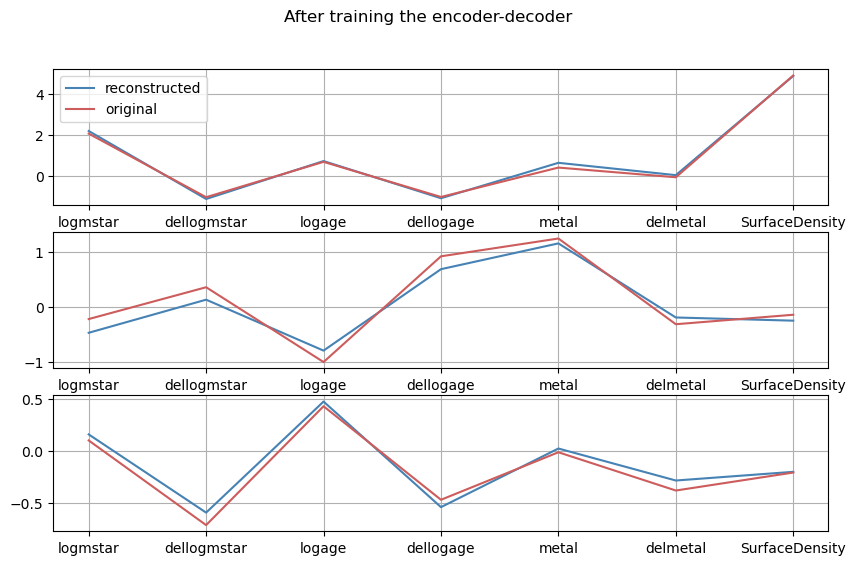

In [4]:
# Get metrics of interest 
test_metrics = ['logmstar', 'dellogmstar', 'logage', 'dellogage', 'metal', 'delmetal', 'SurfaceDensity']
# Run autoencoder and return encoded training data 
test, encoded_x_train = ml.autoencoder(gama, test_metrics)

- add explanation of sample reconstruction and loss vs. epoch graph 

### NEURAL NET PREDICTION

In [5]:
# Assuming `catalog` is your original DataFrame and `encoded_x_train` is the output from autoencoder
target_features = ['Z', 'SurfaceDensityErr']  # List of target features to predict
model_history, predicted_values, output_test = ml.neural_net(gama, encoded_x_train, target_features, latent_dim=3, epochs=500)

Epoch 1/500
419/419 [==============================] - 1s 922us/step - loss: 2.5214 - val_loss: 1.5582
Epoch 2/500
419/419 [==============================] - 0s 753us/step - loss: 2.4909 - val_loss: 1.6827
Epoch 3/500
419/419 [==============================] - 0s 728us/step - loss: 2.5833 - val_loss: 1.7387
Epoch 4/500
419/419 [==============================] - 0s 677us/step - loss: 2.4873 - val_loss: 1.6561
Epoch 5/500
419/419 [==============================] - 0s 809us/step - loss: 2.3899 - val_loss: 1.5802
Epoch 6/500
419/419 [==============================] - 0s 694us/step - loss: 2.4500 - val_loss: 1.5709
Epoch 7/500
419/419 [==============================] - 0s 720us/step - loss: 2.4263 - val_loss: 1.6079
Epoch 8/500
419/419 [==============================] - 0s 723us/step - loss: 2.4138 - val_loss: 1.8870
Epoch 9/500
419/419 [==============================] - 0s 690us/step - loss: 2.4173 - val_loss: 1.6443
Epoch 10/500
419/419 [==============================] - 0s 663us/step - l

#### EVALUATION METRICS 

- Mean Square Error (MSE): Commonly used in regression analysis. Lower values indicate a better fit. 

- Root Mean Square Error (RMSE): The square root of the MSE but with the same units as the target variable. Lower values indicate a better fit. 

- Mean Absolute Error (MAE): Average of the absolute errors, less sensitive to outliers than MSE. Lower values indicate a better fit.

- R-squared (R²) AKA coefficient of determination: The amount of variange in the dependent variable that the independent variables explain, ie. the strength of relationship between the model and dependent variable. Values close to 1 indicate a good fit and values close to 0 indicate a poor fit.






    should I add formula for each?? Would this be helpful? 

In [10]:
help(ml.evaluate_predictions)

AttributeError: module 'ml_functions' has no attribute 'evaluate_predictions'

In [9]:
# Test usage of evaluation metrics
metrics = ml.evaluate_predictions(output_test, predicted_values)
print(metrics)

{'MSE': 3.95393169172691, 'RMSE': 1.9884495698224056, 'MAE': 0.3462550327011302, 'R²': 0.03309812189351258}
